# An Investigation in CPI trends in Food

## Background
        
The consumer price index (CPI) is created by the Bureau of Labor Statistics, which is part of the United States Department of Labor. It is a measure of the average price change over time for goods in a market basket. A market basket is a standard list of consumer items that are used for measuring the CPI. Almost all Americans are influenced by the CPI. It can be used as an economic indicator, to adjust for inflation in specific economic goods, or to adjust for changes in the value of the dollar.

The CPI for a given item is defined in relation with an averaged, normalized CPI for the item for a specific year. For example, the average CPI for cheese between the years of 1982-1984 might be set to 100. Any CPI for cheese after this time period would then be in reference to this base value of 100. If the CPI is 120, this means the price of cheese has increased, while if the CPI is 90, this indicates a drop in cheese price. The movements in CPI are commonly expressed as percent changes. This is because the reference base year for different goods varies. The percent change is not affected by the base year and so provides a better measure in changes in CPI between different goods.

CPI is reported as both raw, unadjusted indices, and seasonally adjusted indices. The adjusted indices corrected for buying behaviours related to the time of year, weather patterns, etc. While there are some applications where seasonally adjusted indices are used, most often only the raw indices are considered.

CPI datasets frequently include relative importance. This is a relative weighting factor applied to expenditures.

### Dataset

The CPI dataset I chose was taken from the [Bureau of Labor Statistics](https://www.bls.gov/home.htm) and can be downloaded [here](https://www.bls.gov/cpi/tables/supplemental-files/cpi-u-201904.xlsx).

### Project Layout

As will be seen in the next section, the CPI dataset is quite large, with many different categories. Therefore, I chose to restrict analysis to one category to make the project more self contained. In this project, I will only consider _Food_ and all of the subcategories below food. 

As I explore this dataset, I would like to address the following questions:

1. Is there a difference in CPI distributions when they have been seasonally adjusted?
2. Is there a difference in CPI distributions between subcategories of _Food_?
3. What is the relationhip between goods and CPI?
4. How does CPI and percent change vary between months?
5. How does relative importance vary within the subcategories of _Food_? What is the relationship between relative importance and both CPI and percent change?

In the Conclusion section I will summarize my analysis and findings. I will finish with a Next Steps section, where I layout additional analytical questions I would like to answer going foward.

## Load the Data
I will load the data into a Pandas `DataFrame` and inspect its structure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
df = pd.read_excel('./data/cpi-u-201904-editted.xlsx', header=[3, 4, 5], sheet_name='US')
df = df.dropna()

In [3]:
df['Seasonally adjusted indexes'].columns

MultiIndex(levels=[['Apr.\n2018', 'Apr.\n2018-\nApr.\n2019', 'Apr.\n2019', 'Aug.\n2018', 'Dec.\n2018', 'Feb.\n2019', 'Feb.\n2019-\nMar.\n2019', 'Jan.\n2019', 'Jan.\n2019-\nFeb.\n2019', 'Jul.\n2018', 'Jun.\n2018', 'Largest (L) or Smallest (S) seasonally adjusted change since:(3)', 'Largest (L) or Smallest (S) unadjusted change since:(3)', 'Mar.\n2019', 'Mar.\n2019-\nApr.\n2019', 'May\n2018', 'Nov.\n2018', 'Oct.\n2018', 'Seasonally adjusted effect on All Items\nMar. 2019-\nApr. 2019(1)', 'Sep.\n2018', 'Standard error, median price change(2)', 'Standard error, median price change(2)(4)', 'Unadjusted effect on All Items\nApr. 2018-\nApr. 2019(1)', 'Unnamed: 0_level_1', 'Unnamed: 1_level_1', 'Unnamed: 2_level_1'], ['Date', 'Percent change', 'Unnamed: 0_level_2', 'Unnamed: 10_level_2', 'Unnamed: 11_level_2', 'Unnamed: 12_level_2', 'Unnamed: 13_level_2', 'Unnamed: 14_level_2', 'Unnamed: 15_level_2', 'Unnamed: 16_level_2', 'Unnamed: 17_level_2', 'Unnamed: 18_level_2', 'Unnamed: 19_level_2', 'U

The columns are displayed as a MultiIndex. This is because there are different levels of column names. Some column names include several columns using merged cells in Excel. 

Let's look at the first few rows of the dataset:

In [4]:
df.head()

Indent Level            Expenditure category  \
  Unnamed: 0_level_1              Unnamed: 1_level_1   
  Unnamed: 0_level_2              Unnamed: 1_level_2   
1                1.0                            Food   
2                2.0                    Food at home   
3                3.0     Cereals and bakery products   
4                4.0     Cereals and cereal products   
5                5.0  Flour and prepared flour mixes   

  Relative\nimportance\nMar.\n2019 Unadjusted indexes                     \
                Unnamed: 2_level_1         Apr.\n2018          May\n2018   
                Unnamed: 2_level_2 Unnamed: 3_level_2 Unnamed: 4_level_2   
1                           13.315            253.209            253.098   
2                            7.278            240.129            239.287   
3                            0.961            271.766            271.910   
4                            0.311            227.229            226.927   
5                            0.040            240.692            242.503   

                                                                               \
          Jun.\n2018         Jul.\n2018         Aug.\n2018         Sep.\n2018   
  Unnamed: 5_level_2 Unnamed: 6_level_2 Unnamed: 7_level_2 Unnamed: 8_level_2   
1            253.231            253.746            254.077            254.393   
2            239.158            239.820            240.015            240.125   
3            273.682            273.258            273.338            273.729   
4            227.684            227.818            228.555            228.602   
5            241.001            241.956            240.130            241.831   

                      ... Seasonally adjusted percent change  \
          Oct.\n2018  ...            Feb.\n2019-\nMar.\n2019   
  Unnamed: 9_level_2  ...                Unnamed: 34_level_2   
1            254.358  ...                                0.3   
2            239.882  ...                                0.4   
3            272.260  ...                                0.3   
4            224.065  ...                                1.7   
5            231.474  ...                                1.7   

                           \
  Mar.\n2019-\nApr.\n2019   
      Unnamed: 35_level_2   
1                    -0.1   
2                    -0.5   
3                    -0.1   
4                    -1.0   
5                    -1.1   

                                                          One Month  \
  Seasonally adjusted effect on All Items\nMar. 2019-\nApr. 2019(1)   
                                                Unnamed: 36_level_2   
1                                             -0.014                  
2                                             -0.033                  
3                                             -0.001                  
4                                             -0.003                  
5                                              0.000                  

                                          \
  Standard error, median price change(2)   
                     Unnamed: 37_level_2   
1                                   0.08   
2                                   0.12   
3                                   0.29   
4                                   0.57   
5                                   0.83   

                                                                    \
  Largest (L) or Smallest (S) seasonally adjusted change since:(3)   
                                                              Date   
1                                        S-Jun. 2017                 
2                                        S-Mar. 2016                 
3                                        S-Jan. 2019                 
4                                        S-Oct. 2018                 
5                                        S-Oct. 2018                 

                                                             Twelve Mont

The column names and a view of the first few lines of this `DataFrame` indicate that the structure of this dataset is quite complicated. There are a lot of merged columns and merging at different levels. We can view the top column level, which designates sections of the dataset.

In [5]:
print(df.columns.levels[0])

Index(['Expenditure category', 'Indent Level', 'One Month',
       'Relative\nimportance\nMar.\n2019', 'Seasonally adjusted indexes',
       'Seasonally adjusted percent change', 'Twelve Month',
       'Unadjusted indexes', 'Unadjusted percent change'],
      dtype='object')


The _Seasonally adjusted indexes_ and _Unadjusted indexes_ are sub-divided into months, for the past 13 months. I will restrict my analysis to these two sections since I am interested in studying trends in CPI overtime. Let's look at the _Seasonally adjusted indexes_ section and view a few rows:

In [6]:
df['Seasonally adjusted indexes'].head()

,Apr.\n2018,May\n2018,Jun.\n2018,Jul.\n2018,Aug.\n2018,Sep.\n2018,Oct.\n2018,Nov.\n2018,Dec.\n2018,Jan.\n2019,Feb.\n2019,Mar.\n2019,Apr.\n2019
,Unnamed: 16_level_2,Unnamed: 17_level_2,Unnamed: 18_level_2,Unnamed: 19_level_2,Unnamed: 20_level_2,Unnamed: 21_level_2,Unnamed: 22_level_2,Unnamed: 23_level_2,Unnamed: 24_level_2,Unnamed: 25_level_2,Unnamed: 26_level_2,Unnamed: 27_level_2,Unnamed: 28_level_2
1,253.036,253.207,253.503,253.879,254.065,254.208,254.115,254.616,255.501,256.059,257.097,257.812,257.543
2,239.833,239.475,239.626,240.048,239.994,239.805,239.464,239.760,240.490,240.765,241.843,242.707,241.593
3,271.755,271.876,272.974,272.785,272.824,273.801,272.753,274.269,275.335,274.288,276.162,276.976,276.629
4,227.052,226.398,226.918,226.526,227.349,228.643,224.615,226.100,226.763,225.414,226.878,230.781,228.567
5,239.413,238.446,238.639,237.484,237.208,240.162,234.343,234.708,235.659,234.435,233.292,237.252,234.749


The columns look pretty messy still. In addition, this sub-dataset is missing information about the _Expenditure category_, _Indent level_ and _Relative Importance_. Let's clean up this sub-dataset and add the additional columns.

## Data Cleaning
Working with a clean dataset is important as it makes it easier to analyze the data. In this section, I will restructure and clean the `DataFrame`. Specifically, I will: 
* Remove references to footnotes.
* Remove new line charecters from the date column names. 
* Remove the second level, 'Unnamed' column names.
* Add the additional columns _Expenditure category_, _Indent Level_, and _Relative Importance_.

In [7]:
# Remove references to footnotes
def remove_footnotes(exp_cat):
    return exp_cat.split('(')[0]

In [8]:
def clean_dataset(df, section):
    df_clean = df[section]
    
    # Reformat the date labels
    date_labels = [x[0] for x in df_clean.columns]
    date_labels = [x.replace('\n', ' ') for x in date_labels]
    
    # Create new DataFrame with only date column names
    df_clean = pd.DataFrame(df_clean.values, columns=date_labels)
    
    # Add additional columns
    df_clean['Relative importance Mar. 2019'] = df['Relative\nimportance\nMar.\n2019'].values
    df_clean['Expenditure category'] = df['Expenditure category'].values
    df_clean['Indent Level'] = df['Indent Level'].values
    
    # Remove footnote references
    df_clean['Expenditure category'] = df_clean['Expenditure category'].apply(remove_footnotes)
    
    return df_clean

In [9]:
df_adjusted = clean_dataset(df, 'Seasonally adjusted indexes')
df_adjusted.head()

,Apr. 2018,May 2018,Jun. 2018,Jul. 2018,Aug. 2018,Sep. 2018,Oct. 2018,Nov. 2018,Dec. 2018,Jan. 2019,Feb. 2019,Mar. 2019,Apr. 2019,Relative importance Mar. 2019,Expenditure category,Indent Level
0,253.036,253.207,253.503,253.879,254.065,254.208,254.115,254.616,255.501,256.059,257.097,257.812,257.543,13.315,Food,1.0
1,239.833,239.475,239.626,240.048,239.994,239.805,239.464,239.760,240.490,240.765,241.843,242.707,241.593,7.278,Food at home,2.0
2,271.755,271.876,272.974,272.785,272.824,273.801,272.753,274.269,275.335,274.288,276.162,276.976,276.629,0.961,Cereals and bakery products,3.0
3,227.052,226.398,226.918,226.526,227.349,228.643,224.615,226.100,226.763,225.414,226.878,230.781,228.567,0.311,Cereals and cereal products,4.0
4,239.413,238.446,238.639,237.484,237.208,240.162,234.343,234.708,235.659,234.435,233.292,237.252,234.749,0.040,Flour and prepared flour mixes,5.0


Great! That looks better.

Let's do the same thing for the _Unadjusted indexes_ section as well:

In [10]:
df_unadjusted = clean_dataset(df, 'Unadjusted indexes')

### Features
I will keep track of the main features I am interested using a `list`. These features are: _Expenditure category_, _Indent Level_, _Relative importance Mar. 2019_.

In [11]:
def get_features():
    return ['Expenditure category', 'Indent Level', 'Relative importance Mar. 2019']

### Percent Change
As mentioned in the Background section, percent change provides a more normalized way to compare different subcategories. I will create a function I can use to compute percent changes. In the analysis section, I will compare results using CPI and percent change.

In [12]:
def compute_percent_change(df):
    df_transposed = df.drop(get_features(), axis=1).T.copy()
    df_transposed.columns = df['Expenditure category']
    df_percent_change = df_transposed.pct_change().T.dropna(axis=1)
    df_percent_change.reset_index(inplace=True)
    df_percent_change['Indent Level'] = df['Indent Level'].values
    df_percent_change['Relative importance Mar. 2019'] = df['Relative importance Mar. 2019'].values
    return df_percent_change    

## Exploratory Data Analysis
### Accessing Sub-Categories
I have created a function I can use to slice the `DataFrame` with the cleaned dataset into smaller datasets that only include data for a specific category and its subcategories.

In [13]:
def get_subcategories(df, category):
    indent_levels = df['Indent Level'].values
    selected_cat = df.loc[df['Expenditure category'] == category, ['Expenditure category', 'Indent Level']]
    cat_index = selected_cat.index.values[0]
    cat_indent_level = selected_cat['Indent Level'].values[0]
    last_index = cat_index
    for i in indent_levels[cat_index+1:]:
        if i > cat_indent_level:
            last_index += 1
        else:
            break
    return df.iloc[cat_index:last_index+1]

### Investigating Indent Levels
Each CPI can be divided into sub-indices or categories. These in turn can be further divided into smaller and smaller categories that become more and more specific. In this dataset, this hierarchy of categories is specified using indent levels. Let's see how many different levels there are.

In [14]:
def indent_level_info(df):
    unique_indent_levels = np.unique(df['Indent Level'])
    num_levels = len(unique_indent_levels)
    min_level = np.min(unique_indent_levels)
    max_level = np.max(unique_indent_levels)
    print('There are {} indent levels which range from {} to {}.'.format(num_levels, min_level, max_level))

In [15]:
indent_level_info(df_unadjusted)

There are 7 indent levels which range from 1.0 to 7.0.


Let's look at all the categories for indent level 1.

In [16]:
print(df_unadjusted.loc[df_unadjusted['Indent Level'] == 1.0, 'Expenditure category'].values)

['Food' 'Energy' 'All items less food and energy' 'All items less food'
 'All items less shelter' 'All items less food and shelter'
 'All items less food, shelter, and energy'
 'All items less food, shelter, energy, and used cars and trucks'
 'All items less medical care' 'All items less energy' 'Commodities'
 'Services' 'Durables' 'Nondurables' 'Housing'
 'Education and communication' 'Recreation' 'Food and beverages'
 'Other services' 'Apparel less footwear' 'Fuels and utilities'
 'Medical care' 'Transportation' 'Utilities and public transportation'
 'Household furnishings and operations' 'Other goods and services']


Let's see how many sub-categories are under each of these indent level 1 categories.

In [17]:
level_1_cats = df_unadjusted.loc[df_unadjusted['Indent Level'] == 1.0, 'Expenditure category'].values
print('Subcategory count per Indent Level 1 item:')
for cat in level_1_cats:
    print(' - {}: {}'.format(cat, len(get_subcategories(df_unadjusted, cat))))

Subcategory count per Indent Level 1 item:
 - Food: 84
 - Energy: 11
 - All items less food and energy: 173
 - All items less food: 1
 - All items less shelter: 1
 - All items less food and shelter: 1
 - All items less food, shelter, and energy: 1
 - All items less food, shelter, energy, and used cars and trucks: 1
 - All items less medical care: 1
 - All items less energy: 1
 - Commodities: 4
 - Services: 3
 - Durables: 1
 - Nondurables: 5
 - Housing: 1
 - Education and communication: 5
 - Recreation: 4
 - Food and beverages: 2
 - Other services: 1
 - Apparel less footwear: 1
 - Fuels and utilities: 2
 - Medical care: 1
 - Transportation: 3
 - Utilities and public transportation: 1
 - Household furnishings and operations: 1
 - Other goods and services: 2


The majority of sub-categories fall underneath _All items less food and energy_. _Food_ and _Energy_ take the second and third spots, respectively.

### Food
Going forward, I will restrict analysis only to the category _Food_ and all of its subcategories.

In [18]:
df_food_adjusted = get_subcategories(df_adjusted, 'Food')
df_food_unadjusted = get_subcategories(df_unadjusted, 'Food')

### Subcategories of Food
Let's investigate what subcatetories are included in the _Food_ category.

In [19]:
def print_subcategory_counts(df, category, indent_level):
    df_sub_cat = get_subcategories(df, category)
    sub_cats = df_sub_cat.loc[df_sub_cat['Indent Level'] == indent_level, 'Expenditure category'].values
    print('Sub-category count at Indent Level {} for category {}:'.format(indent_level, category))
    for cat in sub_cats:
        print(' - {}: {}'.format(cat, len(get_subcategories(df, cat))))

In [20]:
print_subcategory_counts(df_food_unadjusted, 'Food', 2)

Sub-category count at Indent Level 2 for category Food:
 - Food at home: 77
 - Food away from home: 6


There are more subcategories in _Food at home_ than there are in _Food away from home_. This could indicate that the foods people buy at home are more important indicators of how the economy is performing as compared to how people purchase food away from home.

#### Level 3 subcategories
Let's look at the next level down below these two categories, _Food at home_ and _Food away from home_.

At indent level 3 _Food at home_ can be divided into the following subcategories:

In [21]:
print_subcategory_counts(df_food_unadjusted, 'Food at home', 3)

Sub-category count at Indent Level 3 for category Food at home:
 - Cereals and bakery products: 10
 - Meats, poultry, fish, and eggs: 21
 - Dairy and related products: 5
 - Fruits and vegetables: 16
 - Nonalcoholic beverages and beverage materials: 8
 - Other food at home: 16


Notice that these subcategories make up the main food groups, which seems like a logic way to group these items. Within this subcategory, _Meats, poultry, fish, and eggs_ encompass the largest number of additional subcatories, 21, while _Dairy and related products_ encompass the smallest number of additional subcatories, 5.

At indent level 3, _Food away from home_ can be divided into these subcategories:

In [22]:
print_subcategory_counts(df_food_unadjusted, 'Food away from home', 3)

Sub-category count at Indent Level 3 for category Food away from home:
 - Full service meals and snacks: 1
 - Limited service meals and snacks: 1
 - Food at employee sites and schools: 1
 - Food from vending machines and mobile vendors: 1
 - Other food away from home: 1


### Unadjusted compared with Adjusted Indexes: Food
Intuitively, one would expect seasonlly adjusted and unadjusted indices should come from the same distribution. This is because the adjusted indices are derived from the unadjusted indices using a weighting function. Nevertheless, let's compare how similar they are.

In [23]:
def compare_adjusted_unadjusted_single_cat(df_adjusted, df_unadjusted, category):

    df_cpi_adjusted = df_adjusted[df_adjusted['Expenditure category'] == category].drop(get_features(), axis=1)
    df_cpi_unadjusted = df_unadjusted[df_unadjusted['Expenditure category'] == category].drop(get_features(), axis=1)

    # Plot relationship between adjusted and unadjusted CPI for a single category
    plt.figure(figsize=(12, 4))
    plt.plot(df_cpi_adjusted.values[0], label='adjusted')
    plt.plot(df_cpi_unadjusted.values[0], label='unadjusted')
    xtick_labels = df_cpi_adjusted.columns
    locs, labels = plt.xticks()
    plt.xticks(locs, xtick_labels)
    plt.legend(loc='upper left')
    plt.xlabel('Month')
    plt.ylabel('CPI')
    plt.title('Comparing Seasonally Adjusted and Unadjusted CPI for {}'.format(category))
    plt.show()
    
    t_stats = ttest_ind(df_cpi_adjusted.values[0], df_cpi_unadjusted.values[0])
    print('Statistics:')
    print(' - t-statisic: {}'.format(t_stats.statistic))
    print(' - pvalue: {}'.format(t_stats.pvalue))

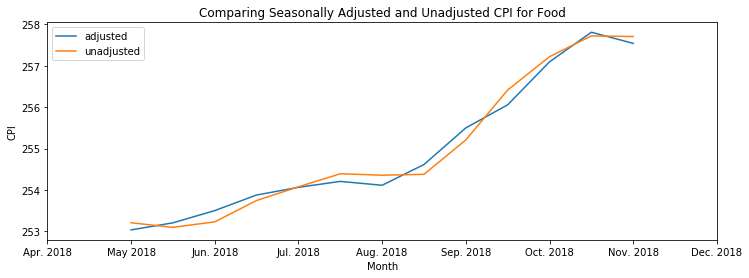

Statistics:
 - t-statisic: -0.015215915609692798
 - pvalue: 0.9879857102508298


In [24]:
compare_adjusted_unadjusted_single_cat(df_food_adjusted, df_food_unadjusted, 'Food')

For _Food_, the differences between the adjusted and unadjusted CPIs do not appear that different. The small t-statistic and large pvalue indicate there is not a large difference between the seasonally adjusted and unadjusted CPIs for _Food_. But, this analysis could suffer from small number statistics, since we are only considering 13 points for each distribution.

### Unadjusted compared with Adjusted Indexes: Food Plus Sub-Categories Under Food

One way to increase the sample size is to group the CPIs for all subcategories under _Food_. Since there are 84 subcategories, the sample size will now increase to 1092 (84 $\times$ 13). I will compare each distribution by creating histograms for adjusted and unadjusted indices.

In [25]:
print('There are {} sub-categories under Food.'.format(len(df_food_adjusted['Expenditure category'])))

There are 84 sub-categories under Food.


In [26]:
def compare_adjusted_unadjusted_multi_cats(df_adjusted, df_unadjusted, category):

    df_cpi_adjusted = df_adjusted.drop(get_features(), axis=1)
    df_cpi_unadjusted = df_unadjusted.drop(get_features(), axis=1)
    
    # Plot histograms for each distribution of CPIs
    plt.figure(figsize=(8, 6))
    plt.hist(df_cpi_adjusted.values.flatten(), alpha=0.7, label='unadjusted')
    plt.hist(df_cpi_unadjusted.values.flatten(), alpha=0.7, label='adjusted')
    plt.title('{} Including All Subcategories'.format(category))
    plt.xlabel('CPI')
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()
    
    t_stats = ttest_ind(df_cpi_adjusted.values.flatten(), df_cpi_unadjusted.values.flatten())
    print('Statistics:')
    print(' - t-statisic: {}'.format(t_stats.statistic))
    print(' - pvalue: {}'.format(t_stats.pvalue))

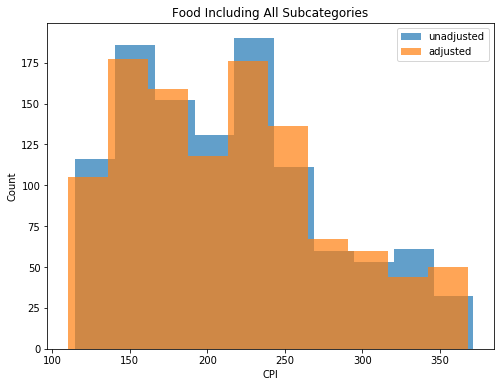

Statistics:
 - t-statisic: 0.0063854661647863645
 - pvalue: 0.9949057534729242


In [27]:
compare_adjusted_unadjusted_multi_cats(df_food_adjusted, df_food_unadjusted, 'Food')

The t-statistic and pvalue show that there is an even closer relationship between the adjusted and unajusted indices.

More interestingly, the histogram shows a double peaked distribution in CPI. 

## Double Peaked CPI Distribution
Let's investigate the double peaks in the CPI distribution to see what expenditure categories are included in each.

In [28]:
def find_top_two_bins(df):
    cpi_values = df.drop(get_features(), axis=1).values.flatten()
    counts_and_bins = np.histogram(cpi_values)
    top_two_maxes = np.sort(counts_and_bins[0])[::-1][:2]
    top_two_bins = []
    for max_value in top_two_maxes:
        i = np.where(counts_and_bins[0] == max_value)[0][0]
        top_two_bins.append(list(counts_and_bins[1][i:i+2]))
    return top_two_bins

In [29]:
def compare_peaks(df):
    top_two_bins = find_top_two_bins(df)
    
    df_cpi = df.drop(get_features(), axis=1)

    df_first_max = df_cpi[(df_cpi >= top_two_bins[0][0]) & (df_cpi < top_two_bins[0][1])]
    df_first_max['Expenditure category'] = df['Expenditure category'].values
    df_first_max['Relative importance Mar. 2019'] = df['Relative importance Mar. 2019'].values
    df_first_max['Indent Level'] = df['Indent Level'].values
    df_first_max.sort_values(by=['Expenditure category'], inplace=True)
    df_first_max = df_first_max.dropna().reset_index()
    
    df_second_max = df_cpi[(df_cpi >= top_two_bins[1][0]) & (df_cpi < top_two_bins[1][1])]
    df_second_max['Expenditure category'] = df['Expenditure category'].values
    df_second_max['Indent Level'] = df_food_adjusted['Indent Level'].values
    df_second_max['Relative importance Mar. 2019'] = df['Relative importance Mar. 2019'].values
    df_second_max.sort_values(by=['Expenditure category'], inplace=True)
    df_second_max = df_second_max.dropna().reset_index()
    
    df_peaks = pd.DataFrame({'First Peak Expenditure Categories': df_first_max['Expenditure category'].values,
                         'Second Peak Expenditure Categories': df_second_max['Expenditure category'].values})
    
    return df_peaks

In [30]:
compare_peaks(df_food_unadjusted)

,First Peak Expenditure Categories,Second Peak Expenditure Categories
0,"Bacon, breakfast sausage, and related products",Breakfast cereal
1,Candy and chewing gum,Cereals and cereal products
2,Chicken,Cheese and related products
3,Frozen fruits and vegetables,Dairy and related products
4,Other dairy and related products,Fats and oils
5,Other fats and oils including peanut butter,Ice cream and related products
6,Other processed fruits and vegetables includin...,Other foods
7,Other sweets,Other meats
8,Other uncooked poultry including turkey,Poultry
9,Processed fish and seafood,Sugar and sweets


There does not appear to be any trends in _Expenditure Category_ in either of the two peaks in the histogram.

### Food, Unadjusted CPI
Going forward, I will only perform analysis on the unadjusted CPIs of _Food_. To make things simpler, I will save **`df_food_unadjusted`** to a separate `DataFrame`.

In [31]:
df_food = df_food_unadjusted.copy()

## Monthly Variations
Let's investigate how CPI and percent change vary between months. 
### CPI
First, let's find out which months show the highest and lowest CPI values.

In [32]:
def find_cpi_extremes(df):
    df_described = df.drop(get_features(), axis=1).describe().T
    min_cpi = df_described['min'].min()
    max_cpi = df_described['max'].max()
    min_cpi_month = df_described[df_described['min'] == min_cpi].index[0]
    max_cpi_month = df_described[df_described['max'] == max_cpi].index[0]
    print('Month with lowest CPI is {} [CPI = {}].'.format(min_cpi_month, min_cpi))
    print('Month with highest CPI is {} [CPI = {}].'.format(max_cpi_month, max_cpi))

In [33]:
find_cpi_extremes(df_food)

Month with lowest CPI is Aug. 2018 [CPI = 110.003].
Month with highest CPI is Jan. 2019 [CPI = 367.988].


We can visually examine the distributions in CPI by month using boxplots.

In [34]:
def plot_cpi_by_month(df, percent_change=False):
    if percent_change:
        df = compute_percent_change(df).copy()
        description = 'Percent Change'
    else:
        description = 'CPI'
    plt.figure(figsize=(16, 6))
    dates = list(df.drop(get_features(), axis=1).columns.values)
    df.boxplot(column=dates)
    plt.title('Unadjusted {}'.format(description))
    plt.ylabel('{}'.format(description))

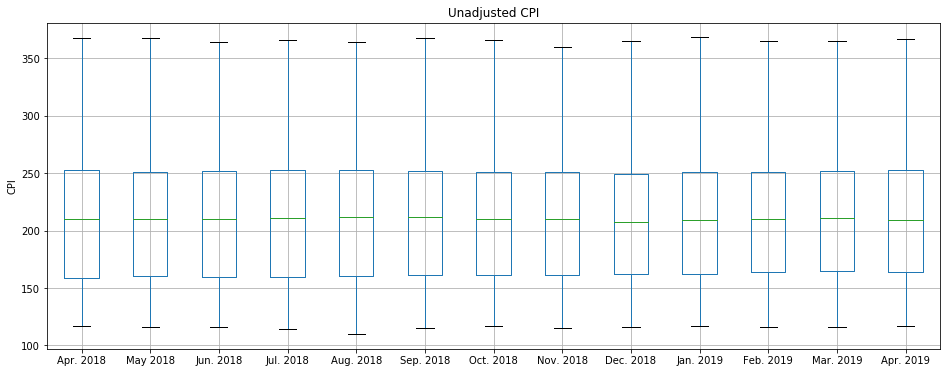

In [35]:
plot_cpi_by_month(df_food)

These boxplots show that the mean CPI for all subcategoreis of _Food_ does not vary a lot. But, for each month there is a large spread in CPI across subcategories.
#### Percent Change
We can also see how percent change varies betweens months.

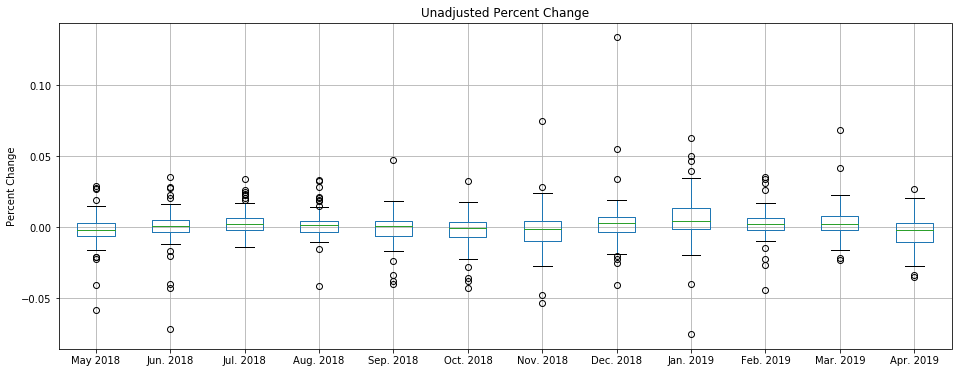

In [36]:
plot_cpi_by_month(df_food, percent_change=True)

The boxplots for percent change show more variation than the boxplots for CPI. There are more outliers. The largest and smallest outliers occur in December, 2018.

### Extreme Values
#### CPIs
Now, I will compute mean and standard deviations for the CPIs for each expenditure category. This way I can see which expenditure category has the highest CPI and which has the lowest.

In [37]:
def cpi_stats(df, category, percent_change=False):
    df_subcat = get_subcategories(df, category)
    if percent_change:
        df_subcat = compute_percent_change(df_subcat).copy()
    expenditure_category = df_subcat['Expenditure category'].values[1:]
    relative_importance = df_subcat['Relative importance Mar. 2019'].values[1:]
    indent_level = df_subcat['Indent Level'].values[1:]
    means = []
    stds = []
    for subcat in expenditure_category:
        if subcat == category:  # Only include subcatogories of parent category
            continue
        df_cpi = df_subcat[df_subcat['Expenditure category'] == subcat].drop(get_features(), axis=1)
        subcat_mean = df_cpi.values[0].mean()
        subcat_std = df_cpi.values[0].std()
        means.append(subcat_mean)
        stds.append(subcat_std)
    df_subcat_stats = pd.DataFrame({'Expenditure category': expenditure_category,
                                    'Relative importance': relative_importance,
                                    'Indent Level': indent_level,
                                    'mean': means,
                                    'std': stds})
    return df_subcat_stats

In [38]:
def compare_cpi_extremes(df, category, percent_change=False):
    
    if percent_change:
        df = compute_percent_change(df).copy()
        description = 'Percent Change'
        offsets = [0.1, 0.15]
        percent_change = False
    else:
        description = 'CPI'
        offsets = [30, 80]
    
    df_stats = cpi_stats(df, category, percent_change)
    
    smallest_category = df_stats.loc[df_stats['mean'] == df_stats['mean'].min(), 'Expenditure category'].values[0]
    smallest_indent_level = df_stats.loc[df_stats['mean'] == df_stats['mean'].min(), 'Indent Level'].values[0]
    
    largest_category = df_stats.loc[df_stats['mean'] == df_stats['mean'].max(), 'Expenditure category'].values[0]
    largest_indent_level = df_stats.loc[df_stats['mean'] == df_stats['mean'].max(), 'Indent Level'].values[0]
    
    smallest_cpi = df[df['Expenditure category'] == smallest_category].drop(get_features(), axis=1).values[0]
    largest_cpi = df[df['Expenditure category'] == largest_category].drop(get_features(), axis=1).values[0]
    
    plt.figure(figsize=(16, 4))
    plt.plot(smallest_cpi, label='{}'.format(smallest_category))
    plt.plot(largest_cpi, label='{}'.format(largest_category))
    plt.ylim(df_stats['mean'].min() - offsets[0], df_stats['mean'].max() + offsets[1])
    xtick_labels = df.drop(get_features(), axis=1).columns
    plt.xticks(np.arange(len(xtick_labels)), xtick_labels)
    plt.grid(True)
    plt.title('Comparing Subcatories of {} w/ Largest and Smallest Mean {}'.format(category, description))
    plt.xlabel('Month')
    plt.ylabel('{}'.format(description))
    plt.legend(loc='upper left')
    plt.show()
    
    print('Mean {}s'.format(description))
    print(' - smallest = {:3.3f} [{}, indent level {}]'.format(df_stats['mean'].min(), smallest_category, smallest_indent_level))
    print(' - largest = {:3.3f} [{}, indent level {}]'.format(df_stats['mean'].max(), largest_category, largest_indent_level))

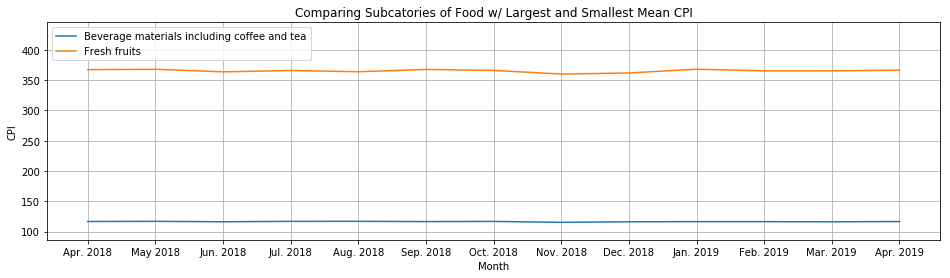

Mean CPIs
 - smallest = 116.558 [Beverage materials including coffee and tea, indent level 4.0]
 - largest = 365.309 [Fresh fruits, indent level 5.0]


In [39]:
compare_cpi_extremes(df_food, 'Food')

The expenditure category with the largest mean CPI is _Fresh fruits_, while the expenditure category with the smallest mean CPI is _Beverage materials including coffee and tea_.

#### Percent Change
I will also perform this same analysis using percent change.

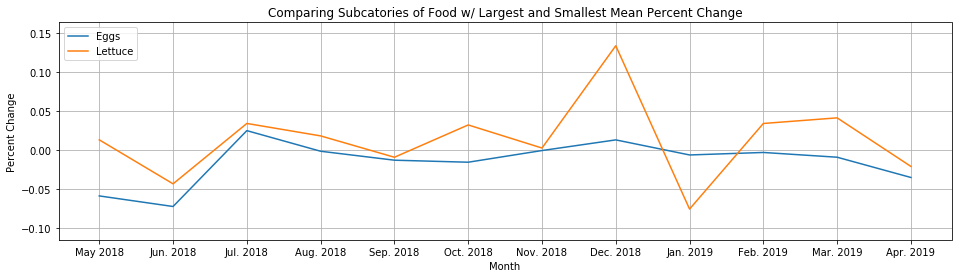

Mean Percent Changes
 - smallest = -0.014 [Eggs, indent level 5.0]
 - largest = 0.014 [Lettuce, indent level 6.0]


In [40]:
compare_cpi_extremes(df_food, 'Food', percent_change=True)

The expenditure category with the smallest mean percent change is _Eggs_, while the expenditure category with the largest mean percent change is _Lettuce_.

Notice that the expenditure categories at the extremes are different for CPI and percent change. The mean for CPI is affected by when the base level was set for a specific category, while the mean for percent change is more dependent on how much positive variation there is.

### Variations by Subcategory
#### CPI
Let's now compare how CPIs vary from month-to-month across different subcategories of _Food_. This will be a similiar analysis to the boxplots shown above, but will use a different visualization. In this case, I will use line plots to show the variability across months for each subcategory. Since _Food_ includes 84 total subcategories, I will only consider a smaller subset of subcategories by only using subcategories at indent level 3. These subcategories will be one indent level down from _Food at home_ and _Food away from home_.

In [41]:
def compare_cpis(df, category, deepest_level, percent_change=False):
    
    if percent_change:
        df = compute_percent_change(df).copy()
        description = 'Percent Change'
        offsets = [0.005, 0.015]
    else:
        description = 'CPI'
        offsets = [30, 140]
    
    df = df.loc[df['Indent Level'] == deepest_level, :].copy()
    df_cpi = df.drop(get_features(), axis=1)
    
    plt.figure(figsize=(16, 8))
    for cat in np.sort(df['Expenditure category'].values):
        plt.plot(df_cpi[df['Expenditure category'] == cat].values[0], label='{}'.format(cat))
    plt.ylim(df_cpi.values.min() - offsets[0], df_cpi.values.max() + offsets[1])
    xtick_labels = df_cpi.columns
    plt.xticks(np.arange(len(xtick_labels)), xtick_labels)
    plt.grid(True)
    plt.title('Month vs. {} for {} at Indent Level {}'.format(description, category, deepest_level))
    plt.xlabel('Month')
    plt.ylabel('{}'.format(description))
    plt.legend(loc='upper left')
    plt.show()

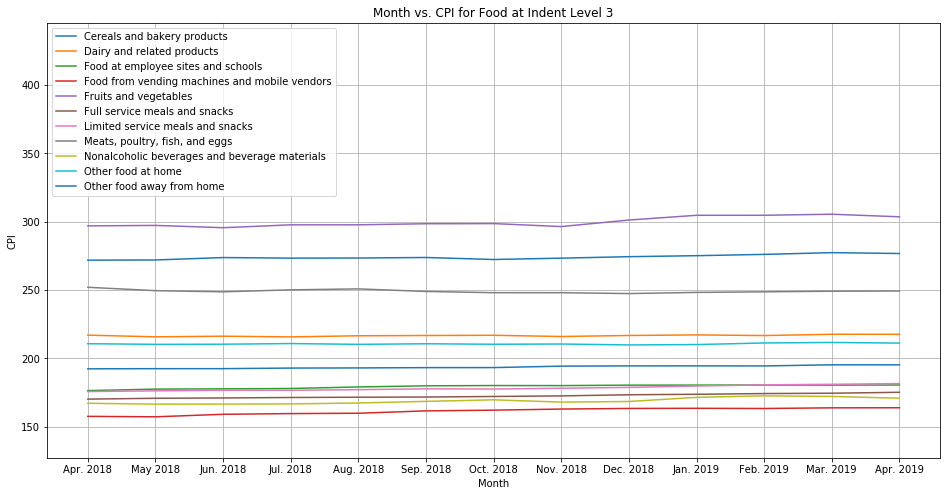

In [42]:
compare_cpis(df_food, 'Food', 3)

_Fruits and vegetables_ show the largest CPI, while _Food from vending machines and mobile vendors_ show the smallest CPI.

#### Percent Change
We can also compare how percent change varies overtime for these subcategories.

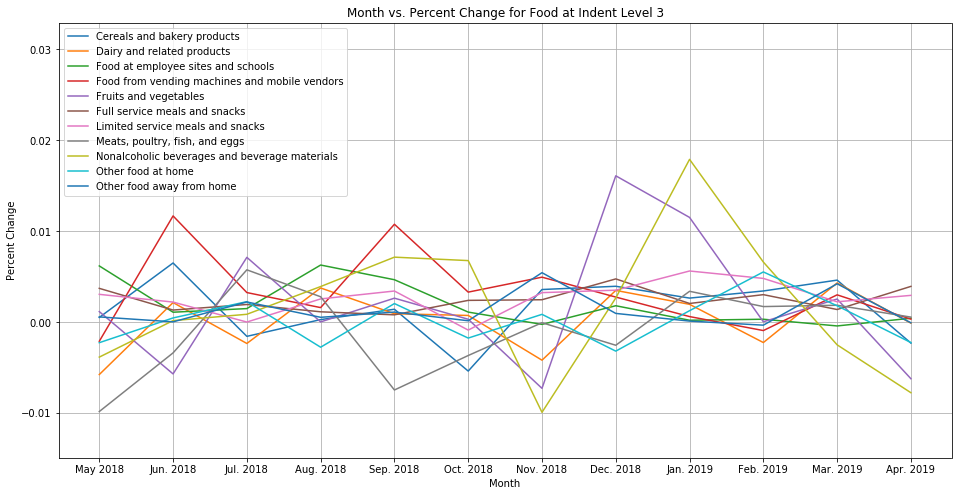

In [43]:
compare_cpis(df_food, 'Food', 3, percent_change=True)

There is a lot of variation in percent change overtime, albeit on a small scale between -0.01 and 0.02. _Food from vending machines and mobile vendors_ vary more in percent change at the beginning of the year than at the end of the year. _Nonalcoholic beverages and beverage materials_ dip in November and peak in January. _Fruits and vegetables_ show a similar trend, they dip in November, but peak in December instead of January. 

### Comparing Relative Importance
#### CPI
I now compare the mean and standard deviation in CPI value for each subcategory in _Food_ with its relative importance. I will use a scatter plot to show the comparison.

In [44]:
def compare_cpi_relative_importance(df, category, percent_change=False):
    if percent_change:
        df = compute_percent_change(df)
        description = 'Percent Change'
        percent_change=False
    else:
        description = 'CPI'
    
    df_stats = cpi_stats(df, 'Food', percent_change)

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    axs[0].scatter(x=df_stats['mean'], y=df_stats['Relative importance'], s=50)
    axs[0].grid(True)
    axs[0].set_title('Mean {} vs. Relative Importance'.format(description))
    axs[0].set_xlabel('Mean {}'.format(description))
    axs[0].set_ylabel('Relative Importance')
    
    axs[1].scatter(x=df_stats['std'], y=df_stats['Relative importance'], s=50)
    axs[1].grid(True)
    axs[1].set_title('Standard Deviation {} vs. Relative Importance'.format(description))
    axs[1].set_xlabel('Standard Deviation {}'.format(description))
    axs[1].set_ylabel('Relative Importance')
    
    fig.tight_layout()
    plt.show()

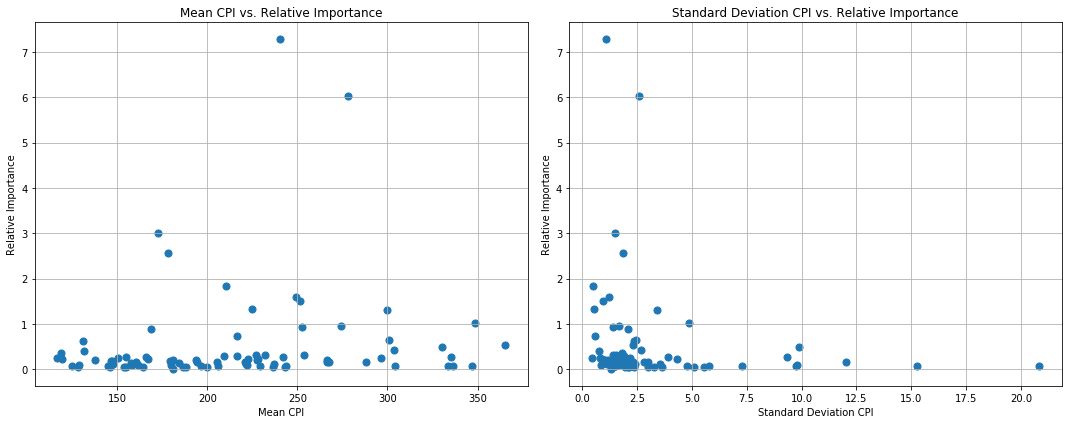

In [45]:
compare_cpi_relative_importance(df_food, 'Food')

While there are some peaks, there is not trend in relative importance with respect to mean CPI. On the other hand, when considering the standard deviation in CPI, relative importance is large for small variations in CPI, but small for large variations in CPI.

#### Percent Change
Let's now compare how relative importance is related to percent change.

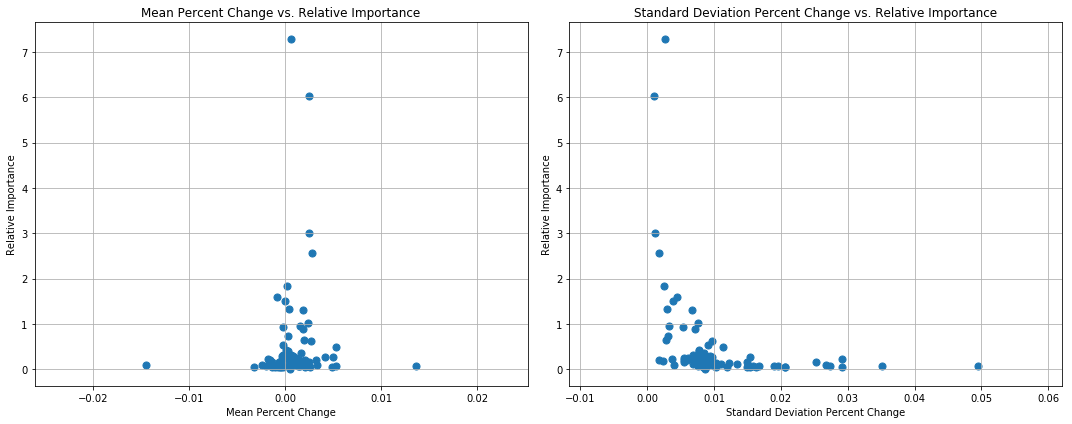

In [46]:
compare_cpi_relative_importance(df_food, 'Food', percent_change=True)

Percent changes near zero mean show larger relative importance, while percent changes farther from zero mean show a smaller relative importance. This makes sense since percent change is a measure of variability and we saw above that a lower standard deviation in CPI is associated with a higher relative importance. The trend in percent change standard deviation is the same as that for CPI.

From these plots I can conclude that relative importance depends on the variability in CPI. The smaller the variability there is, the larger the relative importance.

#### Subcategories
Let's now see if there is a relationship between relative importance and subcategory. For this analysis I will restrict subcategories with a relative importance greater than one. This will include the subcatogories showing the most variability in relative importance.

In [47]:
def compare_category_relative_importance(df, cat, thresh):
    df_stats = cpi_stats(df, cat)
    df_stats_sorted = df_stats.sort_values(by=['Relative importance'])
    df_stats_sorted = df_stats_sorted[df_stats_sorted['Relative importance'] > thresh]
    plt.figure(figsize=(8, 6))
    plt.barh(df_stats_sorted['Expenditure category'], df_stats_sorted['Relative importance'])
    plt.xlabel('Relative Importance')
    plt.title('Relative Importance vs. Food Subcategory')
    plt.show()

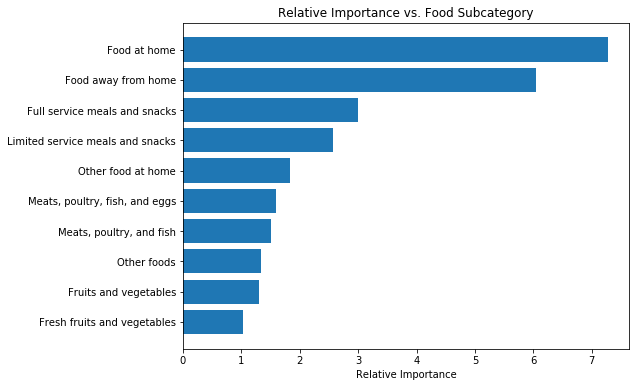

In [48]:
compare_category_relative_importance(df_food, 'Food', 1)

The barplot shows that _Food at home_ has the highest level of relative importance, while the category with the smallest relative importance greater than one is _Fresh fruits and vegetables_. Since _Food at home_ includes a lot of subcategories, it makes sense that the relative importance for this category is large.

### Conclusions
The analysis of CPI as related to food covered a wide range of topics. In the beginning I explored whether CPI values adjusted and unadjusted for seasonal effects came from different distributions. I reached the conclusion that they did not and were closely related as I had expected. During this analysis I discovered that the CPI distributions are double peaked or bimodal. I then investigated whether there was a trend in expenditure category for these two peaks and concluded that there wasn't.

I explored how CPI and percent change vary over time. The mean in CPI across the subcategories of _Food_ does not vary a lot, but there is a large spread in CPI values per month. Percent change shows a lot of variability on a small scale over time.

I studied the relative importance and how it was related to the mean and standard deviation for CPI and percent change, respectively. I concluded that subcategories with a smaller variation in CPI over time have a larger relative importance.

Lastly, I investigated the relationship between relative importance and the subcategories of _Food_. The subcategory with the largest relative importance was _Food at home_, while _Fresh fruits and vegetables_ was at the lower end. Since _Food at home_ includes a lot of subcategories, it makes sense that the relative importance for this category is large.


### Next Steps
One of the main characteristics of this dataset is the timeseries. The CPI for each category and subcategory has monthly data over the past year. I would like to use these data to make a forecast model and predict how the CPI could change during the next year. This may require extending the dataset to include past years; using only 13 time steps might not be enough to make accurate predictions. There are many different methods for performing forecasting. First, I would like to consider a simple model, such as using a moving average. Then, I would like to explore a more complex model using a recurrent neural network. By experimenting with different forecast models, I can decide which approach is best for making future predictions of CPI.